In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Data generating processes
The data will come from either of two types of sources.

1. Linear combination of sines and cosines
2. Linear combination of Legendre polynomials

defined on the interal $t \in [-\frac 1 2, +\frac 1 2]$

## Family 1: Sines and Cosines (Fourier Series)

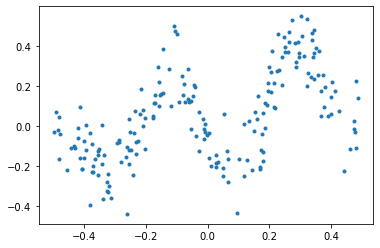

In [2]:
# produce training data
sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

t = np.random.rand(n) - 0.5

def fourier(t, p):
    n = t.size
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

p = 6   # number of features
X = fourier(t, p)  
theta = 0.1*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

## Family 2: Legendre Polynomials

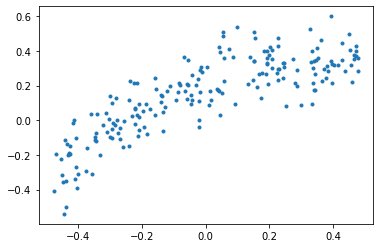

In [3]:
from scipy import special

# produce training data

sigma = 0.1
n = 200 # number of samples 
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

def legendre(t, p):
    n = t.size
    return np.stack(
        [special.legendre(d)(t) for d in range(p)])

p = 6  # number of features
X = legendre(t, p)
theta = 0.4*np.random.randn(p) # weight
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')


## Explanation

0.5376050179240067


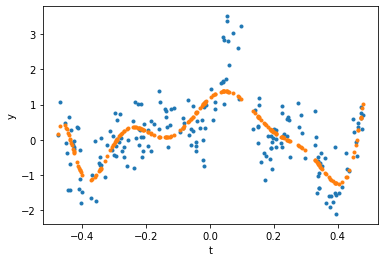

In [4]:
# Given observation points
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5


#  Ground truth (HIDDEN!)
features = fourier
p = 11
X = features(t, p)
theta = [0.2, 0.7, 0.3, -0.2, 0.4, -0.5, 0.1, 0.2, 0.1, 0.5, 0.3]

# Generated data based on ground truth
y = theta @ X + 0.5*np.random.randn(n)

plt.plot(t, y, '.')
plt.xlabel('t')
plt.ylabel('y')

# How do find the ground truth


# Hypothesize 
features = legendre
p = 11
X = features(t, p)

# Cross-validation
mse = 0
nfolds = 100
for i in range(nfolds):
    split = np.random.rand(n) < 0.1
    X_train = X[:, ~split]
    y_train = y[~split]
    X_test = X[:, split]
    y_test = y[split]

    theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
    y_predict = theta_hat @ X_test   #  predict

    mse += ((y_test - y_predict)**2).mean()  # cost function

print(mse/nfolds)

plt.plot(t, theta_hat @ X, '.')


## Assignment
Due Oct 30

Given some points $(t, y)$, find the model that will predict $y$ from $t$ for new data sampled from the same process. Assume Gaussian noise. Assume that the data are


The data come from one of the models above but the degree p is unknown.

In [5]:
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])

Text(0, 0.5, 'y')

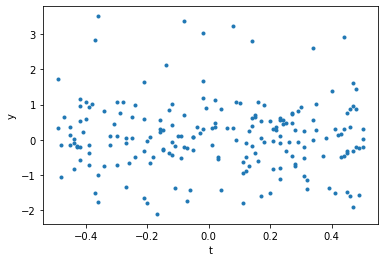

In [6]:
plt.plot(t, y, '.')
plt.xlabel('t')
plt.ylabel('y')

## Steps
1. Select performance measure (cost function): Use MSE.
2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.
3. Visualize the fit and print the training cost function.
4. Fit with a different model and a different p.
5. Use 10-fold cross-validation to compare models. Measure average cross-validated MSE. Output: best model and best p.
6. (In class or evaluation) use the testing data set to test the perfomance.

Model Fourier: 0.012287582154449033


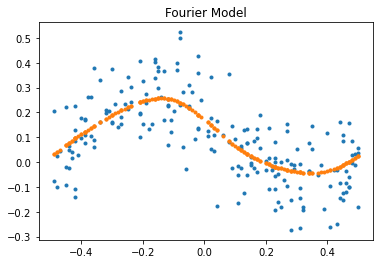

In [7]:
# Family 1: Sines and Cosines (Fourier Series)

t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])
#t is the same, source: lecture

def fourier(t, p):
    n = t.size
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

p = 6   # number of features
X = fourier(t, p)  
theta = 0.1*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

# Hypothesize 
features = fourier
p = 6
X = features(t, p)

# Cross-validation
n=200
mse = 0
nfolds = 10
for i in range(nfolds):
    split = np.random.rand(n) < 0.5
    X_train = X[:, ~split]
    y_train = y[~split]
    X_test = X[:, split]
    y_test = y[split]

    theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
    y_predict = theta_hat @ X_test   #  predict

    mse += ((y_test - y_predict)**2).mean()  # cost function
    
    fourier_option=mse/nfolds

print("Model Fourier:", fourier_option)

plt.plot(t, theta_hat @ X, '.')
plt.title("Fourier Model")
plt.show()

In [8]:
# validate set shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6, 106) (106,)
(6, 94) (94,)


Model Legendre: 0.01225189856234927


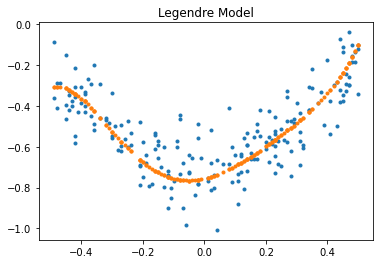

In [9]:
## Family 2: Legendre Polynomials 
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])
#t is the same, source: lecture 

def legendre(t, p):
    n = t.size
    return np.stack(
        [special.legendre(d)(t) for d in range(p)]) 

p = 6  # number of features
X = legendre(t, p)
theta = 0.4*np.random.randn(p) # weight
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

# Hypothesize 
features = legendre
p = 6 #number of features 
X = features(t, p)

# Cross-validation
n=200
mse = 0
nfolds = 10
for i in range(nfolds):
    split = np.random.rand(n) < 0.5
    X_train = X[:, ~split]
    y_train = y[~split]
    X_test = X[:, split]
    y_test = y[split]

    theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
    y_predict = theta_hat @ X_test   #  predict

    mse += ((y_test - y_predict)**2).mean()  # cost function
    
    legendre_option=mse/nfolds

print("Model Legendre:", legendre_option)

plt.plot(t, theta_hat @ X, '.')
plt.title("Legendre Model")
plt.show()

In [10]:
# validate set shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6, 94) (94,)
(6, 106) (106,)


In [11]:
#inspired by Cinny Patel 
if(fourier_option < legendre_option):
    print("Best Model : Fourier",fourier_option)
else:
    print("Best Model : Legegndre", legendre_option)

Best Model : Legegndre 0.01225189856234927


### For refference: the below code belongs to Cinni Patel

In [12]:
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])

y = np.array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,  0.08, -0.38,  0.19, -0.18,  0.13, -0.03,  0.1 ,
        0.1 , -0.05, -0.29, -0.36,  0.12, -0.42, -0.32, -0.  ,  0.22,
        0.  , -0.36, -0.33,  0.06, -0.04,  0.18, -0.08, -0.22, -0.25,
        0.09, -0.03, -0.17,  0.02, -0.09,  0.13,  0.24, -0.04,  0.15,
       -0.44, -0.02, -0.24,  0.09,  0.17, -0.35, -0.15, -0.1 ,  0.08,
        0.  ,  0.09,  0.22, -0.38,  0.06,  0.14, -0.26,  0.19,  0.41,
        0.13, -0.13,  0.3 , -0.15, -0.02, -0.09, -0.07,  0.31,  0.04,
       -0.02, -0.05,  0.07,  0.16, -0.21,  0.01, -0.2 , -0.09,  0.11,
        0.08, -0.  ])

In [13]:
def fourier(t, p):
    n = t.size
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

In [14]:
def legendre(t, p):
    n = t.size
    return np.stack(
        [special.legendre(d)(t) for d in range(p)])


In [15]:
def find_ground_truth(feature,p):
    n=200    
    nfolds=10
    mse_val = 0
    mse_val_total = 0    
    arr_mse = [];#what does this mean? 
    dict = {};      
    for j in range(1,p+1): #why p+1? 
        mse_val = 0;
        for i in range(nfolds):
            X = feature(t,j+1) #why j+1? 
            
            split = np.random.rand(n) < 0.1 #why 0.1, 10%? 
            
            X_train= X[:,~split]
            y_train=y[~split]

            X_test=X[:,split]
            y_test=y[split]

            theta_hat=np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
            y_predict = theta_hat @ X_test 

            mse_val += ((y_test - y_predict)**2).mean()  # cost function
            
        mse_val_total = mse_val/nfolds;
        dict.update({mse_val_total:j})
        arr_mse.append(mse_val_total);
        
        plt.plot(t,theta_hat @ X, '.',label=str(j))
        plt.legend(fontsize=7, loc="center right")
    return arr_mse,dict

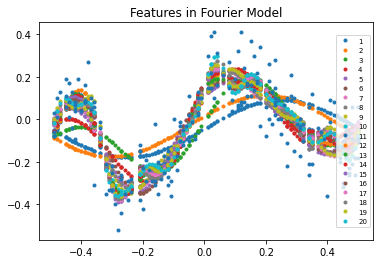

In [16]:
fourier_mse,fourier_dict = find_ground_truth(fourier,20)
fourier_min_mse=min(fourier_mse);    
plt.plot(t, y, '.') 
plt.title("Features in Fourier Model")
plt.show()

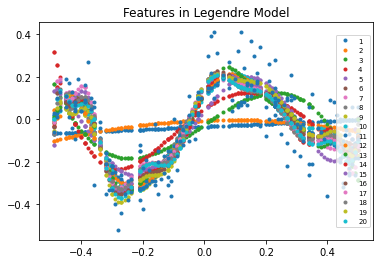

In [17]:
legendre_mse,legendre_dict = find_ground_truth(legendre,20)
legendre_min_mse=min(legendre_mse);
plt.plot(t, y, '.') 
plt.title("Features in Legendre Model")
plt.show()


In [18]:
if(fourier_min_mse < legendre_min_mse):
    print("Best Model : Fourier")
    print('Number of Feature(s): ',fourier_dict.get(fourier_min_mse), ' Min MSE:',fourier_min_mse)
else:
    print("Best Model : Legegndre")
    print('Number of Feature(s): ', legendre_dict.get(legendre_min_mse), ' Min MSE:',legendre_min_mse)

Best Model : Legegndre
Number of Feature(s):  18  Min MSE: 0.011127667114188472
